In [17]:
import pandas as pd

In [18]:
# df = pd.read_csv('ablation_study_out_of_domain.csv')
df = pd.read_csv('ablation_study_physical_risks.csv')

In [19]:
df.head()


,LLM,Few-shot w/ COT,Few-shot w/o COT,0-shot w/ COT,0-shot w/o COT
0,Claude Sonnet,67.8,66.1,47.4,20.3
1,GPT-3.5,49.2,28.9,10.2,15.3
2,Mistral Large,62.7,76.3,32.2,23.7
3,Mistral 8x22B,66.1,74.6,45.8,23.7
4,Mistral 8x7B,44.1,45.8,10.2,10.2


In [20]:
df = df.set_index('LLM')

In [21]:
df

,Few-shot w/ COT,Few-shot w/o COT,0-shot w/ COT,0-shot w/o COT
LLM,,,,
Claude Sonnet,67.8,66.1,47.4,20.3
GPT-3.5,49.2,28.9,10.2,15.3
Mistral Large,62.7,76.3,32.2,23.7
Mistral 8x22B,66.1,74.6,45.8,23.7
Mistral 8x7B,44.1,45.8,10.2,10.2


In [22]:
df

,Few-shot w/ COT,Few-shot w/o COT,0-shot w/ COT,0-shot w/o COT
LLM,,,,
Claude Sonnet,67.8,66.1,47.4,20.3
GPT-3.5,49.2,28.9,10.2,15.3
Mistral Large,62.7,76.3,32.2,23.7
Mistral 8x22B,66.1,74.6,45.8,23.7
Mistral 8x7B,44.1,45.8,10.2,10.2


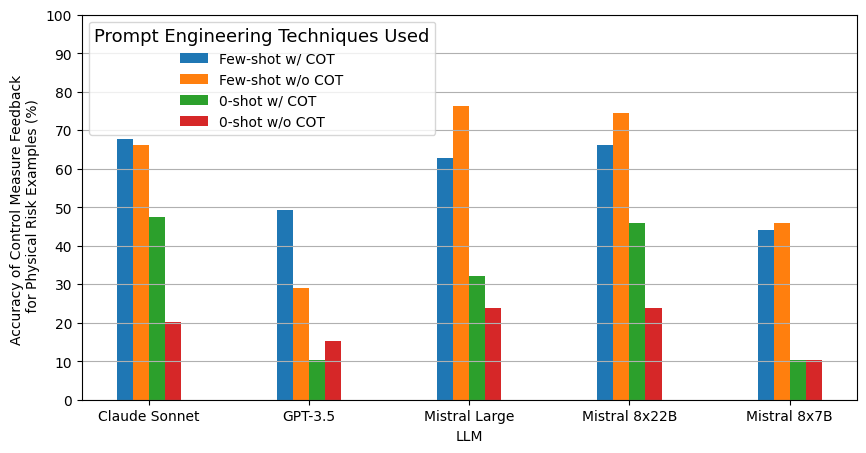

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Number of categories (rows) and series (columns)
categories = df.index
series = df.columns

# Number of categories and series
num_categories = len(categories)
num_series = len(series)

# Position of bars on x-axis
x = np.arange(num_categories)

# Bar width
bar_width = 0.1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10,5))

# Plot each column (series) as a grouped bar
for i, ser in enumerate(series):
    # Position for each group
    positions = x + i * bar_width
    ax.bar(positions, df[ser], bar_width, label=ser)

# Set the position of the x ticks
ax.set_xticks(x + (num_series / 2 - 0.5) * bar_width)

# Set the labels for the x ticks
ax.set_xticklabels(categories)

ax.set_ylim(0, 100)
ax.set_yticks(range(0, 101, 10))

ax.grid(axis='y')

# Set labels and title
ax.set_xlabel('LLM')
# ax.set_ylabel('Accuracy of Control Measure Feedback \n for Risk Register Examples (%)')
ax.set_ylabel('Accuracy of Control Measure Feedback \n for Physical Risk Examples (%)')

# Add legend with title
legend = ax.legend(title='Prompt Engineering Techniques Used')
legend.get_title().set_fontsize('13')  # Optionally set the font size of the legend title

# Show the plot
plt.show()